In [1]:
import pandas as pd

from pathlib import Path

In [3]:
csvpath = Path("sales.csv")
sales_dataframe = pd.read_csv(csvpath)
sales_dataframe

,Name,Count,Revenue
0,Andrew,9,58
1,Phil,8,377
2,Madison,5,302
3,Sally,1,75
4,Tyler,1,334
5,Billy,7,146
6,Steve,1,178
7,Madison,7,313
8,Sarah,8,103
9,Tim,5,344


In [5]:
# return the first 5 rows in the dataframe

sales_dataframe.head(2)

,Name,Count,Revenue
0,Andrew,9,58
1,Phil,8,377


In [6]:
# last rows in the datafram

sales_dataframe.tail()

,Name,Count,Revenue
24,Madison,4,202
25,John,4,305
26,Phil,6,249
27,Madison,7,113
28,Sally,6,256


In [11]:
sales_data = pd.read_csv(csvpath, header = None)
sales_data
my_columns = ['A', 'B', 'C']
sales_data.columns = my_columns
sales_data
sales_data.describe()


,A,B,C
count,30,30,30
unique,17,9,30
top,Madison,1,313
freq,5,7,1


In [35]:
csvpath_stock = Path("stock_data.csv")
stock_dataframe = pd.read_csv(csvpath_stock, header=None)

stock_dataframe.head(10)
stock_cols = ["Date", "Close", "Volume", "Open", "High", "Low"]
stock_dataframe.columns = stock_cols
stock_dataframe.head(10)
stock_dataframe.tail(10)
stock_dataframe.describe()
stock_dataframe.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [23]:
# rename columns
stock_dataframe = stock_dataframe.rename(columns = {'Close': 'close_price', 'Open': 'open_price'})

In [25]:
stock_dataframe.columns

Index(['Date', 'close_price', 'Volume', 'open_price', 'High', 'Low'], dtype='object')

In [32]:
# reorder columns
stock_dataframe = stock_dataframe[['Date', 'close_price', 'Volume', 'open_price', 'Low', 'High']]
stock_dataframe

# create columns
stock_dataframe["mid"] = (stock_dataframe['Low'] + stock_dataframe['High'])/2
stock_dataframe

# split columns
dates = stock_dataframe['Date'].str.split("/", expand=True)
stock_dataframe['year'] = dates[2]
stock_dataframe

# delete columns
stock_dataframe = stock_dataframe.drop(columns=['mid'])
stock_dataframe.head()


,Date,close_price,Volume,open_price,Low,High,year
0,4/29/09,3.51,11537950,3.40,3.38,3.56,09
1,4/30/09,3.61,18193730,3.55,3.53,3.73,09
2,5/1/09,3.82,16233940,3.55,3.55,3.90,09
3,5/4/09,4.26,21236940,3.90,3.83,4.30,09
4,5/5/09,4.32,16369170,4.36,4.11,4.39,09


In [74]:
# DATA CLEANING
csvpath_sales = Path("sales_output.csv")
sales_df = pd.read_csv(csvpath_sales,index_col="Name")
sales_df

# count non-empty values for each column
sales_df.count()

Count      29
Revenue    29
Average    29
dtype: int64

In [40]:
sales_df.shape

(29, 3)

In [41]:
sales_df.dtypes

Count        int64
Revenue      int64
Average    float64
dtype: object

In [75]:
# check empty values
sales_df['Average'].value_counts()
sales_df.isnull()
sales_df.isnull().sum()

Count      0
Revenue    0
Average    0
dtype: int64

In [76]:
sales_df['test'] = None
sales_df
sales_df['test'] = sales_df['test'].fillna('unknown')
# sales_df['test2'] = None

# clean rows that have Nulls
# sales_df = sales_df.dropna().copy()
sales_df

,Count,Revenue,Average,test
Name,,,,
Andrew,9,58,6.44,unknown
Phil,8,377,47.12,unknown
Madison,5,302,60.40,unknown
Sally,1,75,75.00,unknown
Tyler,1,334,334.00,unknown
Billy,7,146,20.86,unknown
Steve,1,178,178.00,unknown
Madison,7,313,44.71,unknown
Sarah,8,103,12.88,unknown


In [77]:
sales_df.duplicated()

Name
Andrew     False
Phil       False
Madison    False
Sally      False
Tyler      False
Billy      False
Steve      False
Madison    False
Sarah      False
Tim        False
Andrew     False
Phil       False
Madison    False
Carl       False
Devon      False
Megan      False
Sarah      False
David      False
Sally      False
Tom        False
Andrew     False
Paul       False
Carl       False
Tim        False
Madison    False
John       False
Phil       False
Madison    False
Sally      False
dtype: bool

In [118]:
import pandas as pd
from pathlib import Path

dccsv = Path("DC_stock_data.csv")
dc_stock_df = pd.read_csv(dccsv)

dc_stock_df.describe()
dc_stock_df.shape  
# (504, 14)

dc_stock_df.head()
dc_stock_df.count()
# dc_stock_df.columns

dc_stock_df.isnull().mean()*100

dc_stock_df = dc_stock_df.dropna().copy()
dc_stock_df
dc_stock_df.isnull().sum()
dc_stock_df['ebitda'].isnull()
# dc_stock_df.columns
dc_stock_df['ebitda'] = dc_stock_df['ebitda'].fillna(0)
dc_stock_df['ebitda'].isnull().sum()
dc_stock_df.duplicated().sum()

# dc_stock_df.drop_duplicates()
# dc_stock_df.duplicated().sum()

0

In [122]:
dc_stock_df.count()
dc_stock_df.iloc[0:10, 3]

0     $222.89
2       56.27
3      108.48
5      108.48
6      185.16
7      109.63
10        178
11     179.11
14      152.8
15      62.49
Name: price, dtype: object

In [123]:
dc_stock_df.head(2)

,symbol,name,sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,ebitda,price_per_sales,price_per_book,sec_filings
0,MMM,3M Company,Industrials,$222.89,24.31,2.332862,$7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [124]:
# tell the column number of a given column name
dc_stock_df.columns.get_loc('dividend_yield')

5

In [132]:
# remove $ in the price column
dc_stock_df['price'] = dc_stock_df['price'].str.replace('$','')
dc_stock_df.head(2)


,symbol,name,sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,ebitda,price_per_sales,price_per_book,sec_filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,$7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
# set index to be one column
dc_stock_df = dc_stock_df.set_index(dc_stock_df['symbol'])
dc_stock_df.head(2)
dc_stock_df.loc['ABT']

# cast column data type: astype

In [16]:
lcsvpath = Path("loans.csv")

loans_data = pd.read_csv(lcsvpath)

loans_data.head(10)
loans_data.describe()

# filtered dataframe
filtered_df = loans_data.filter(items = ['loan_amnt', 'term', 'int_rate', 'emp_title', 'annual_inc', 'purpose'])
filtered_df_copy = filtered_df.copy()

# filtered_df['term'] = '3 years'
# filtered_df = filtered_df.set_index('term')


# filtered_df.head()
# .str.replace('36 months','3 years')# 

term_df = filtered_df_copy.loc[filtered_df_copy['term'] == '36 months'].copy()
term_df

,loan_amnt,term,int_rate,emp_title,annual_inc,purpose
0,10000,36 months,0.1033,NaN,280000.0,debt_consolidation
1,4000,36 months,0.2340,Security,90000.0,debt_consolidation
2,5000,36 months,0.1797,Administrative,59280.0,debt_consolidation
3,9600,36 months,0.1298,NaN,35704.0,home_improvement
4,2500,36 months,0.1356,Chef,55000.0,debt_consolidation
...,...,...,...,...,...,...
128407,23000,36 months,0.1502,Tax Consultant,75000.0,debt_consolidation
128408,10000,36 months,0.1502,security guard,38000.0,debt_consolidation
128409,5000,36 months,0.1356,Payoff Clerk,35360.0,debt_consolidation
128410,10000,36 months,0.1106,NaN,44400.0,credit_card


In [20]:
term_df.isnull()
term_df['emp_title'] = filtered_df['emp_title'].fillna('Unknown')
term_df['purpose'].value_counts()

# loc: conditional on the columns
term_df.loc[term_df['annual_inc'] > 90000]

,loan_amnt,term,int_rate,emp_title,annual_inc,purpose
0,10000,36 months,0.1033,Unknown,280000.0,debt_consolidation
20,24000,36 months,0.1502,MAINTENANCE PLANNER,105000.0,credit_card
21,16000,36 months,0.1447,Carpenter,150000.0,other
34,7000,36 months,0.1072,Business Analyst,97000.0,other
54,5500,36 months,0.1131,Engineer,98000.0,debt_consolidation
...,...,...,...,...,...,...
128370,40000,36 months,0.0611,Senior Lead Technologist,150000.0,credit_card
128376,35000,36 months,0.1106,Vice President/Mortgage Loan Officer,125000.0,debt_consolidation
128377,17500,36 months,0.1356,Unknown,150000.0,home_improvement
128384,24000,36 months,0.1356,branch manager,120000.0,debt_consolidation


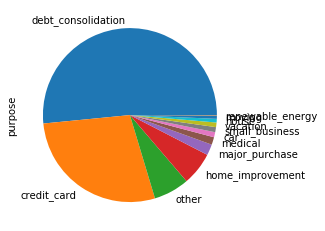

In [23]:
# VISUALIZATION

%matplotlib inline
pcount = term_df['purpose'].value_counts()
pcount.plot(kind='pie')

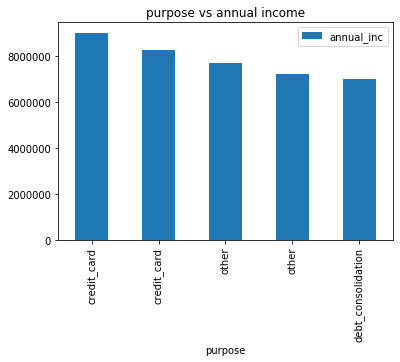

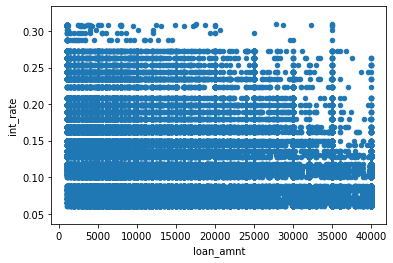

In [44]:
little = term_df.loc[:,['annual_inc','purpose']]
little = little.set_index('purpose')
little.nlargest(5, 'annual_inc').plot(kind='bar', title='purpose vs annual income')

sub2 = term_df.loc[:,['loan_amnt','int_rate']]
# sub2 = sub2.set_index('loan_amnt')
# sub2['int_rate']
sub2.plot(kind='scatter', x='loan_amnt', y='int_rate')